In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_all= pd.read_csv('sanj_climate_soil_data_v3.csv')
df_all

,system:index,B1,B10,B11,B2,B3,B4,B5,B6,B7,B8,B9,CLASS1,evaporation_from_bare_soil,evaporation_from_open_water_surfaces_excluding_oceans,evaporation_from_the_top_of_canopy,evaporation_from_vegetation_transpiration,potential_evaporation,snow_evaporation,total_evaporation,total_precipitation,runoff,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,volumetric_soil_water_layer_3,volumetric_soil_water_layer_4,Unnamed: 26,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m
0,0000000000000000a7ab,0.156138506,291.4980281,290.941162,0.138696171,0.119764067,0.132345934,0.197404472,0.268907663,0.212048671,0.122957659,0.00114323,F,-0.001711,-0.000309,-0.000264,0,-0.005021,0,-0.002283,0.00169,0.000232,0.340073,0.34613,0.36882,0.344696,NaN,-1900802,285.8258514,0.928650856
1,00000000000000005cdf,0.147214935,291.6362041,291.2270035,0.127864037,0.112383781,0.122462284,0.167657735,0.212057256,0.174212108,0.114253015,0.00140626,G,-0.001935,-0.000303,-0.000281,0,-0.00693,0,-0.002518,0.001521,0.000191,0.30275,0.310059,0.336517,0.277695,NaN,-922280,285.8766327,1.283631325
2,5.00E+17,0.146008425,291.2727592,290.9031351,0.126529905,0.112544899,0.124327202,0.169578314,0.208004332,0.170726854,0.114836886,0.001384199,G,-0.001935,-0.000303,-0.000281,0,-0.00693,0,-0.002518,0.001521,0.000191,0.30275,0.310059,0.336517,0.277695,NaN,-922280,285.8766327,1.283631325
3,000000000000000053a6,0.141016194,293.3909297,292.6746974,0.119396924,0.090475826,0.088609293,0.11902655,0.157171755,0.123246598,0.089042376,0.001394305,G,-0.001796,-0.000381,-0.000276,-0.00003,-0.006513,0,-0.002482,0.001606,0.000412,0.258408,0.26799,0.296051,0.264114,NaN,-1048284,285.6207733,1.314393044
4,5899,0.14787132,292.9200832,292.3048137,0.129631362,0.110078913,0.117618789,0.164422408,0.204815363,0.167510555,0.111685891,0.001328958,G,-0.001796,-0.000381,-0.000276,-0.00003,-0.006513,0,-0.002482,0.001606,0.000412,0.258408,0.26799,0.296051,0.264114,NaN,-1048284,285.6207733,1.314393044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,000100000000000034b7,0.141586306,290.1301264,289.8274426,0.12073968,0.100286631,0.100378611,0.180000974,0.174101788,0.123306379,0.099202093,0.001365258,UV,-0.001516,-0.000498,-0.00033,-0.00001,-0.005141,0,-0.002354,0.002512,0.00215,0.432325,0.440839,0.436185,0.429863,NaN,-1430555.667,285.6197968,0.80926609
3774,3553459236846],[-121.08301862332684,38.235531096975635],[-121.08335304158591,38.23552764112185],[-121.08570741069968,38.23551361055645],[-121.08670626770119,38.2355066052644],[-121.08678654668935,38.23550662090511],[-121.08871287649168,38.23549257144631],[-121.08335304158591,38.23552764112185],[-121.08570741069968,38.23551361055645],[-121.0889046507768,38.242094491600135],38.24690289390949],[-121.0889626289887,38.23562216551106],38.24838770201417],[-121.08895370926558,38.24895499800474],[-121.08894924940383,NaN,[-121.08898930070569,38.23577276910855],38.24745264190911]
3775,000100000000000034b8,0.151467255,289.654867,289.2609276,0.130318064,0.108825397,0.106633392,0.185006325,0.168603393,0.124874877,0.107007829,0.004824992,UV,-0.001661,-0.000541,-0.000276,0,-0.00464,0,-0.002478,0.002058,0.000442,0.443161,0.453354,0.470551,0.398979,NaN,-1480625,285.7994843,1.022156715
3776,77623969,38.066433794858106],[-121.2959094555727,38.066770794991484],[-121.29568204972938,38.06746593768315],[-121.29555721639191,38.067764291457706],[-121.29540113088527,38.06817153980879],[-121.29522278460755,38.0684980140537],[-121.29518708040092,38.066770794991484],[-121.29568204972938,38.06746593768315],[-121.29555721639191,38.068838496423474],[-121.29303782428859,[-121.28370041232371,38.07724225643089],[-121.29471000481306,[-121.28327235560718,38.07750547723604],[-121.28288891045293,38.077758236466245],NaN,38.07547312075403],[-121.29432650970925,[-121.28345517259677


In [5]:
column_list = df_all.columns

In [6]:
# select non-numeric value from 'B1' by using to_numeric, then delete these rows by using dropna

for col in column_list:
    df_all[col] = pd.to_numeric(df_all[col], errors='coerce')

# select all the rows without NaN values
df_clean = df_all[(df_all.B1.notnull())&(df_all.evaporation_from_bare_soil.notnull())]
df_clean

,system:index,B1,B10,B11,B2,B3,B4,B5,B6,B7,B8,B9,CLASS1,evaporation_from_bare_soil,evaporation_from_open_water_surfaces_excluding_oceans,evaporation_from_the_top_of_canopy,evaporation_from_vegetation_transpiration,potential_evaporation,snow_evaporation,total_evaporation,total_precipitation,runoff,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,volumetric_soil_water_layer_3,volumetric_soil_water_layer_4,Unnamed: 26,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m
0,NaN,0.156139,291.498028,290.941162,0.138696,0.119764,0.132346,0.197404,0.268908,0.212049,0.122958,0.001143,NaN,-0.001711,-0.000309,-0.000264,0.000000,-0.005021,0.0,-0.002283,0.001690,0.000232,0.340073,0.346130,0.368820,0.344696,NaN,-1900802.000,285.825851,0.928651
1,NaN,0.147215,291.636204,291.227004,0.127864,0.112384,0.122462,0.167658,0.212057,0.174212,0.114253,0.001406,NaN,-0.001935,-0.000303,-0.000281,0.000000,-0.006930,0.0,-0.002518,0.001521,0.000191,0.302750,0.310059,0.336517,0.277695,NaN,-922280.000,285.876633,1.283631
2,5.000000e+17,0.146008,291.272759,290.903135,0.126530,0.112545,0.124327,0.169578,0.208004,0.170727,0.114837,0.001384,NaN,-0.001935,-0.000303,-0.000281,0.000000,-0.006930,0.0,-0.002518,0.001521,0.000191,0.302750,0.310059,0.336517,0.277695,NaN,-922280.000,285.876633,1.283631
3,NaN,0.141016,293.390930,292.674697,0.119397,0.090476,0.088609,0.119027,0.157172,0.123247,0.089042,0.001394,NaN,-0.001796,-0.000381,-0.000276,-0.000030,-0.006513,0.0,-0.002482,0.001606,0.000412,0.258408,0.267990,0.296051,0.264114,NaN,-1048284.000,285.620773,1.314393
4,5.899000e+03,0.147871,292.920083,292.304814,0.129631,0.110079,0.117619,0.164422,0.204815,0.167511,0.111686,0.001329,NaN,-0.001796,-0.000381,-0.000276,-0.000030,-0.006513,0.0,-0.002482,0.001606,0.000412,0.258408,0.267990,0.296051,0.264114,NaN,-1048284.000,285.620773,1.314393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,NaN,0.145618,291.055979,290.808012,0.127851,0.110812,0.121387,0.205664,0.234846,0.160223,0.111828,0.001175,NaN,-0.001560,-0.000569,-0.000275,0.000000,-0.004666,0.0,-0.002404,0.002084,0.000337,0.550140,0.559784,0.568909,0.430252,NaN,-1500316.000,285.970383,1.067323
3771,NaN,0.158675,291.433356,291.092085,0.142223,0.129631,0.139927,0.197233,0.216785,0.174099,0.132532,0.001187,NaN,-0.001560,-0.000569,-0.000275,0.000000,-0.004666,0.0,-0.002404,0.002084,0.000337,0.550140,0.559784,0.568909,0.430252,NaN,-1500316.000,285.970383,1.067323
3772,NaN,0.144910,290.155193,289.948144,0.125949,0.111344,0.123562,0.189587,0.214093,0.161634,0.114771,0.001104,NaN,-0.001591,-0.000447,-0.000314,-0.000004,-0.004743,0.0,-0.002356,0.002334,0.000787,0.568878,0.576279,0.576675,0.467178,NaN,-1463576.000,285.845383,0.908631
3773,NaN,0.141586,290.130126,289.827443,0.120740,0.100287,0.100379,0.180001,0.174102,0.123306,0.099202,0.001365,NaN,-0.001516,-0.000498,-0.000330,-0.000010,-0.005141,0.0,-0.002354,0.002512,0.002150,0.432325,0.440839,0.436185,0.429863,NaN,-1430555.667,285.619797,0.809266


In [7]:
df_clean.describe()

,system:index,B1,B10,B11,B2,B3,B4,B5,B6,B7,B8,B9,CLASS1,evaporation_from_bare_soil,evaporation_from_open_water_surfaces_excluding_oceans,evaporation_from_the_top_of_canopy,evaporation_from_vegetation_transpiration,potential_evaporation,snow_evaporation,total_evaporation,total_precipitation,runoff,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,volumetric_soil_water_layer_3,volumetric_soil_water_layer_4,Unnamed: 26,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m
count,5.080000e+02,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,0.0,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.0,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,0.0,3.300000e+03,3300.000000,3300.000000
mean,1.181497e+95,0.135807,277.227136,276.462418,0.114841,0.095391,0.094387,0.197220,0.178798,0.124285,0.093526,0.002364,NaN,-0.001754,-0.000396,-0.000282,-0.000032,-0.005064,0.0,-0.002464,0.001933,0.000876,0.348567,0.356852,0.374074,0.347083,NaN,-1.344059e+06,281.847843,1.047787
std,2.662068e+96,0.026265,60.943800,61.400666,0.024993,0.025160,0.034431,0.071939,0.053914,0.048117,0.027837,0.002430,NaN,0.000192,0.000173,0.000042,0.000072,0.001218,0.0,0.000101,0.000347,0.000943,0.093692,0.093198,0.088326,0.056658,NaN,2.964285e+05,33.145076,0.274774
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-0.001935,-0.001174,-0.000488,-0.000554,-0.011821,0.0,-0.002787,0.001495,0.000039,0.223206,0.228714,0.241089,0.262589,NaN,-1.941689e+06,0.000000,0.000000
25%,3.176250e+03,0.130447,289.534990,289.067967,0.106068,0.084129,0.073002,0.160340,0.151231,0.090628,0.078357,0.001125,NaN,-0.001887,-0.000437,-0.000290,-0.000028,-0.004982,0.0,-0.002525,0.001649,0.000191,0.302750,0.310059,0.337906,0.291931,NaN,-1.525848e+06,285.622726,0.826722
50%,5.510500e+03,0.136871,290.384713,289.905454,0.114352,0.093100,0.088914,0.195687,0.178960,0.121437,0.090021,0.001384,NaN,-0.001796,-0.000353,-0.000276,-0.000001,-0.004743,0.0,-0.002482,0.001825,0.000412,0.338958,0.346130,0.362030,0.352402,NaN,-1.306320e+06,285.771164,1.074647
75%,7.622250e+03,0.145966,291.520642,291.003297,0.126490,0.107279,0.113465,0.232779,0.209052,0.159087,0.107697,0.002410,NaN,-0.001711,-0.000290,-0.000264,0.000000,-0.004525,0.0,-0.002396,0.002165,0.001288,0.345459,0.353409,0.370148,0.401917,NaN,-1.177582e+06,285.876633,1.282655
max,6.000000e+97,0.272144,298.175874,296.998416,0.273501,0.270435,0.291119,0.513513,0.349448,0.387621,0.276777,0.026435,NaN,-0.000991,-0.000231,-0.000173,0.000000,-0.003164,0.0,-0.002280,0.003448,0.003457,0.642365,0.648285,0.650360,0.482681,NaN,0.000000e+00,286.087570,1.509706


# calculate parameters

In [8]:
# crop water supply

df_clean['CWS'] = df_clean['total_precipitation']

C:\Users\NOODEL~1\AppData\Local\Temp/ipykernel_21980/2273250172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CWS'] = df_clean['total_precipitation']


In [9]:
# crop water requirement
# first part --- ET and runoff
df_clean['ET_runoff'] = df_clean['total_evaporation'] - df_clean['runoff'] 

# second part --- underground water
df_clean['underground_water'] = df_clean['volumetric_soil_water_layer_4'] - df_clean['volumetric_soil_water_layer_1']
df_clean

C:\Users\NOODEL~1\AppData\Local\Temp/ipykernel_21980/3168625056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ET_runoff'] = df_clean['total_evaporation'] - df_clean['runoff']
C:\Users\NOODEL~1\AppData\Local\Temp/ipykernel_21980/3168625056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['underground_water'] = df_clean['volumetric_soil_water_layer_4'] - df_clean['volumetric_soil_water_layer_1']


,system:index,B1,B10,B11,B2,B3,B4,B5,B6,B7,B8,B9,CLASS1,evaporation_from_bare_soil,evaporation_from_open_water_surfaces_excluding_oceans,evaporation_from_the_top_of_canopy,evaporation_from_vegetation_transpiration,potential_evaporation,snow_evaporation,total_evaporation,total_precipitation,runoff,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,volumetric_soil_water_layer_3,volumetric_soil_water_layer_4,Unnamed: 26,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,CWS,ET_runoff,underground_water
0,NaN,0.156139,291.498028,290.941162,0.138696,0.119764,0.132346,0.197404,0.268908,0.212049,0.122958,0.001143,NaN,-0.001711,-0.000309,-0.000264,0.000000,-0.005021,0.0,-0.002283,0.001690,0.000232,0.340073,0.346130,0.368820,0.344696,NaN,-1900802.000,285.825851,0.928651,0.001690,-0.002515,0.004623
1,NaN,0.147215,291.636204,291.227004,0.127864,0.112384,0.122462,0.167658,0.212057,0.174212,0.114253,0.001406,NaN,-0.001935,-0.000303,-0.000281,0.000000,-0.006930,0.0,-0.002518,0.001521,0.000191,0.302750,0.310059,0.336517,0.277695,NaN,-922280.000,285.876633,1.283631,0.001521,-0.002709,-0.025055
2,5.000000e+17,0.146008,291.272759,290.903135,0.126530,0.112545,0.124327,0.169578,0.208004,0.170727,0.114837,0.001384,NaN,-0.001935,-0.000303,-0.000281,0.000000,-0.006930,0.0,-0.002518,0.001521,0.000191,0.302750,0.310059,0.336517,0.277695,NaN,-922280.000,285.876633,1.283631,0.001521,-0.002709,-0.025055
3,NaN,0.141016,293.390930,292.674697,0.119397,0.090476,0.088609,0.119027,0.157172,0.123247,0.089042,0.001394,NaN,-0.001796,-0.000381,-0.000276,-0.000030,-0.006513,0.0,-0.002482,0.001606,0.000412,0.258408,0.267990,0.296051,0.264114,NaN,-1048284.000,285.620773,1.314393,0.001606,-0.002894,0.005706
4,5.899000e+03,0.147871,292.920083,292.304814,0.129631,0.110079,0.117619,0.164422,0.204815,0.167511,0.111686,0.001329,NaN,-0.001796,-0.000381,-0.000276,-0.000030,-0.006513,0.0,-0.002482,0.001606,0.000412,0.258408,0.267990,0.296051,0.264114,NaN,-1048284.000,285.620773,1.314393,0.001606,-0.002894,0.005706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,NaN,0.145618,291.055979,290.808012,0.127851,0.110812,0.121387,0.205664,0.234846,0.160223,0.111828,0.001175,NaN,-0.001560,-0.000569,-0.000275,0.000000,-0.004666,0.0,-0.002404,0.002084,0.000337,0.550140,0.559784,0.568909,0.430252,NaN,-1500316.000,285.970383,1.067323,0.002084,-0.002741,-0.119888
3771,NaN,0.158675,291.433356,291.092085,0.142223,0.129631,0.139927,0.197233,0.216785,0.174099,0.132532,0.001187,NaN,-0.001560,-0.000569,-0.000275,0.000000,-0.004666,0.0,-0.002404,0.002084,0.000337,0.550140,0.559784,0.568909,0.430252,NaN,-1500316.000,285.970383,1.067323,0.002084,-0.002741,-0.119888
3772,NaN,0.144910,290.155193,289.948144,0.125949,0.111344,0.123562,0.189587,0.214093,0.161634,0.114771,0.001104,NaN,-0.001591,-0.000447,-0.000314,-0.000004,-0.004743,0.0,-0.002356,0.002334,0.000787,0.568878,0.576279,0.576675,0.467178,NaN,-1463576.000,285.845383,0.908631,0.002334,-0.003143,-0.101700
3773,NaN,0.141586,290.130126,289.827443,0.120740,0.100287,0.100379,0.180001,0.174102,0.123306,0.099202,0.001365,NaN,-0.001516,-0.000498,-0.000330,-0.000010,-0.005141,0.0,-0.002354,0.002512,0.002150,0.432325,0.440839,0.436185,0.429863,NaN,-1430555.667,285.619797,0.809266,0.002512,-0.004504,-0.002462


In [10]:
# calculate crop water requirement

df_clean['CWR'] = df_clean['ET_runoff'] + df_clean['underground_water'] 
df_clean['NDVI'] =  (df_clean['B5']-df_clean['B4'])/(df_clean['B5']+df_clean['B4'])
df_clean

C:\Users\NOODEL~1\AppData\Local\Temp/ipykernel_21980/983297225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CWR'] = df_clean['ET_runoff'] + df_clean['underground_water']
C:\Users\NOODEL~1\AppData\Local\Temp/ipykernel_21980/983297225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NDVI'] =  (df_clean['B5']-df_clean['B4'])/(df_clean['B5']+df_clean['B4'])


,system:index,B1,B10,B11,B2,B3,B4,B5,B6,B7,B8,B9,CLASS1,evaporation_from_bare_soil,evaporation_from_open_water_surfaces_excluding_oceans,evaporation_from_the_top_of_canopy,evaporation_from_vegetation_transpiration,potential_evaporation,snow_evaporation,total_evaporation,total_precipitation,runoff,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,volumetric_soil_water_layer_3,volumetric_soil_water_layer_4,Unnamed: 26,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,CWS,ET_runoff,underground_water,CWR,NDVI
0,NaN,0.156139,291.498028,290.941162,0.138696,0.119764,0.132346,0.197404,0.268908,0.212049,0.122958,0.001143,NaN,-0.001711,-0.000309,-0.000264,0.000000,-0.005021,0.0,-0.002283,0.001690,0.000232,0.340073,0.346130,0.368820,0.344696,NaN,-1900802.000,285.825851,0.928651,0.001690,-0.002515,0.004623,0.002108,0.197296
1,NaN,0.147215,291.636204,291.227004,0.127864,0.112384,0.122462,0.167658,0.212057,0.174212,0.114253,0.001406,NaN,-0.001935,-0.000303,-0.000281,0.000000,-0.006930,0.0,-0.002518,0.001521,0.000191,0.302750,0.310059,0.336517,0.277695,NaN,-922280.000,285.876633,1.283631,0.001521,-0.002709,-0.025055,-0.027764,0.155782
2,5.000000e+17,0.146008,291.272759,290.903135,0.126530,0.112545,0.124327,0.169578,0.208004,0.170727,0.114837,0.001384,NaN,-0.001935,-0.000303,-0.000281,0.000000,-0.006930,0.0,-0.002518,0.001521,0.000191,0.302750,0.310059,0.336517,0.277695,NaN,-922280.000,285.876633,1.283631,0.001521,-0.002709,-0.025055,-0.027764,0.153965
3,NaN,0.141016,293.390930,292.674697,0.119397,0.090476,0.088609,0.119027,0.157172,0.123247,0.089042,0.001394,NaN,-0.001796,-0.000381,-0.000276,-0.000030,-0.006513,0.0,-0.002482,0.001606,0.000412,0.258408,0.267990,0.296051,0.264114,NaN,-1048284.000,285.620773,1.314393,0.001606,-0.002894,0.005706,0.002812,0.146493
4,5.899000e+03,0.147871,292.920083,292.304814,0.129631,0.110079,0.117619,0.164422,0.204815,0.167511,0.111686,0.001329,NaN,-0.001796,-0.000381,-0.000276,-0.000030,-0.006513,0.0,-0.002482,0.001606,0.000412,0.258408,0.267990,0.296051,0.264114,NaN,-1048284.000,285.620773,1.314393,0.001606,-0.002894,0.005706,0.002812,0.165946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,NaN,0.145618,291.055979,290.808012,0.127851,0.110812,0.121387,0.205664,0.234846,0.160223,0.111828,0.001175,NaN,-0.001560,-0.000569,-0.000275,0.000000,-0.004666,0.0,-0.002404,0.002084,0.000337,0.550140,0.559784,0.568909,0.430252,NaN,-1500316.000,285.970383,1.067323,0.002084,-0.002741,-0.119888,-0.122629,0.257687
3771,NaN,0.158675,291.433356,291.092085,0.142223,0.129631,0.139927,0.197233,0.216785,0.174099,0.132532,0.001187,NaN,-0.001560,-0.000569,-0.000275,0.000000,-0.004666,0.0,-0.002404,0.002084,0.000337,0.550140,0.559784,0.568909,0.430252,NaN,-1500316.000,285.970383,1.067323,0.002084,-0.002741,-0.119888,-0.122629,0.169968
3772,NaN,0.144910,290.155193,289.948144,0.125949,0.111344,0.123562,0.189587,0.214093,0.161634,0.114771,0.001104,NaN,-0.001591,-0.000447,-0.000314,-0.000004,-0.004743,0.0,-0.002356,0.002334,0.000787,0.568878,0.576279,0.576675,0.467178,NaN,-1463576.000,285.845383,0.908631,0.002334,-0.003143,-0.101700,-0.104843,0.210841
3773,NaN,0.141586,290.130126,289.827443,0.120740,0.100287,0.100379,0.180001,0.174102,0.123306,0.099202,0.001365,NaN,-0.001516,-0.000498,-0.000330,-0.000010,-0.005141,0.0,-0.002354,0.002512,0.002150,0.432325,0.440839,0.436185,0.429863,NaN,-1430555.667,285.619797,0.809266,0.002512,-0.004504,-0.002462,-0.006966,0.283981


# select columns useful to our model

In [11]:
df_clean_v2 = df_clean[['CWS','ET_runoff','underground_water','CWR','surface_sensible_heat_flux','skin_temperature','u_component_of_wind_10m','NDVI']]
df_clean_v2.dropna()

,CWS,ET_runoff,underground_water,CWR,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,NDVI
0,0.001690,-0.002515,0.004623,0.002108,-1900802.000,285.825851,0.928651,0.197296
1,0.001521,-0.002709,-0.025055,-0.027764,-922280.000,285.876633,1.283631,0.155782
2,0.001521,-0.002709,-0.025055,-0.027764,-922280.000,285.876633,1.283631,0.153965
3,0.001606,-0.002894,0.005706,0.002812,-1048284.000,285.620773,1.314393,0.146493
4,0.001606,-0.002894,0.005706,0.002812,-1048284.000,285.620773,1.314393,0.165946
...,...,...,...,...,...,...,...,...
3770,0.002084,-0.002741,-0.119888,-0.122629,-1500316.000,285.970383,1.067323,0.257687
3771,0.002084,-0.002741,-0.119888,-0.122629,-1500316.000,285.970383,1.067323,0.169968
3772,0.002334,-0.003143,-0.101700,-0.104843,-1463576.000,285.845383,0.908631,0.210841
3773,0.002512,-0.004504,-0.002462,-0.006966,-1430555.667,285.619797,0.809266,0.283981


In [12]:
df_clean_v2.describe()

,CWS,ET_runoff,underground_water,CWR,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,NDVI
count,3300.000000,3300.000000,3300.000000,3300.000000,3.300000e+03,3300.000000,3300.000000,3206.000000
mean,0.001933,-0.003340,-0.001484,-0.004824,-1.344059e+06,281.847843,1.047787,0.336147
std,0.000347,0.000925,0.067006,0.066416,2.964285e+05,33.145076,0.274774,0.171742
min,0.001495,-0.005911,-0.205795,-0.208388,-1.941689e+06,0.000000,0.000000,-0.341186
25%,0.001649,-0.003781,-0.033844,-0.036321,-1.525848e+06,285.622726,0.826722,0.184894
50%,0.001825,-0.002922,0.008866,0.005979,-1.306320e+06,285.771164,1.074647,0.310057
75%,0.002165,-0.002593,0.045639,0.041968,-1.177582e+06,285.876633,1.282655,0.465850
max,0.003448,-0.002457,0.077347,0.071656,0.000000e+00,286.087570,1.509706,0.805801


In [ ]:
# check the outliers of each column

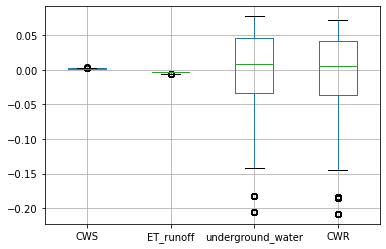

In [13]:
boxplot = df_clean_v2.boxplot(column=['CWS','ET_runoff','underground_water','CWR']) 

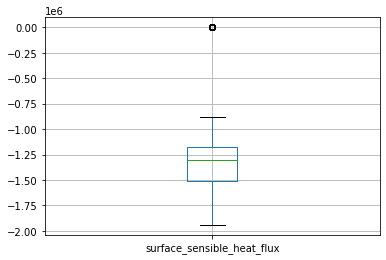

In [222]:
boxplot = df_clean_v2.boxplot(column=['surface_sensible_heat_flux']) 

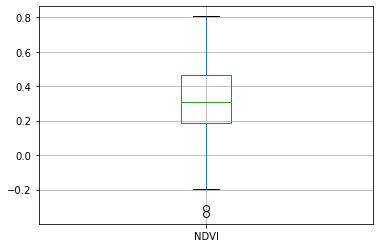

In [36]:
boxplot = df_clean_v2.boxplot(column=['NDVI']) 

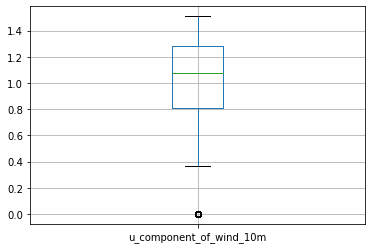

In [224]:
boxplot = df_clean_v2.boxplot(column=['u_component_of_wind_10m']) 

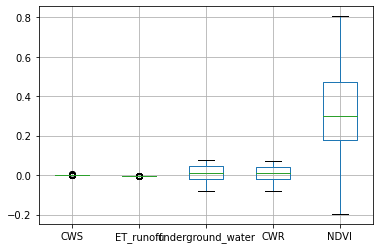

In [37]:
# drop outliers in columns CWR < -0.1

df_clean_v3 = df_clean_v2[(df_clean_v2['CWR']>-0.1)& (df_clean_v2['surface_sensible_heat_flux']<-1)& (df_clean_v2['u_component_of_wind_10m']>0.4)&(df_clean_v2['NDVI']>-0.2)]
boxplot = df_clean_v3.boxplot(column=['CWS','ET_runoff','underground_water','CWR','NDVI']) 

In [38]:
df_clean_v3.describe()

,CWS,ET_runoff,underground_water,CWR,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,NDVI
count,2830.000000,2830.000000,2830.000000,2830.000000,2.830000e+03,2830.000000,2830.000000,2830.000000
mean,0.001904,-0.003395,0.016983,0.013587,-1.369748e+06,285.715911,1.050056,0.336086
std,0.000359,0.000947,0.038764,0.037970,2.609958e+05,0.195833,0.254347,0.174472
min,0.001495,-0.005852,-0.079117,-0.081988,-1.941689e+06,284.573096,0.406922,-0.197296
25%,0.001629,-0.003781,-0.017471,-0.019928,-1.528776e+06,285.620773,0.811952,0.179324
50%,0.001803,-0.002936,0.013244,0.010322,-1.367872e+06,285.732101,1.074647,0.300118
75%,0.002106,-0.002604,0.045639,0.041968,-1.182215e+06,285.819992,1.282655,0.473955
max,0.003312,-0.002457,0.077347,0.071656,-9.222800e+05,286.087570,1.496522,0.805801


# try to find the relationship between cws and cwr

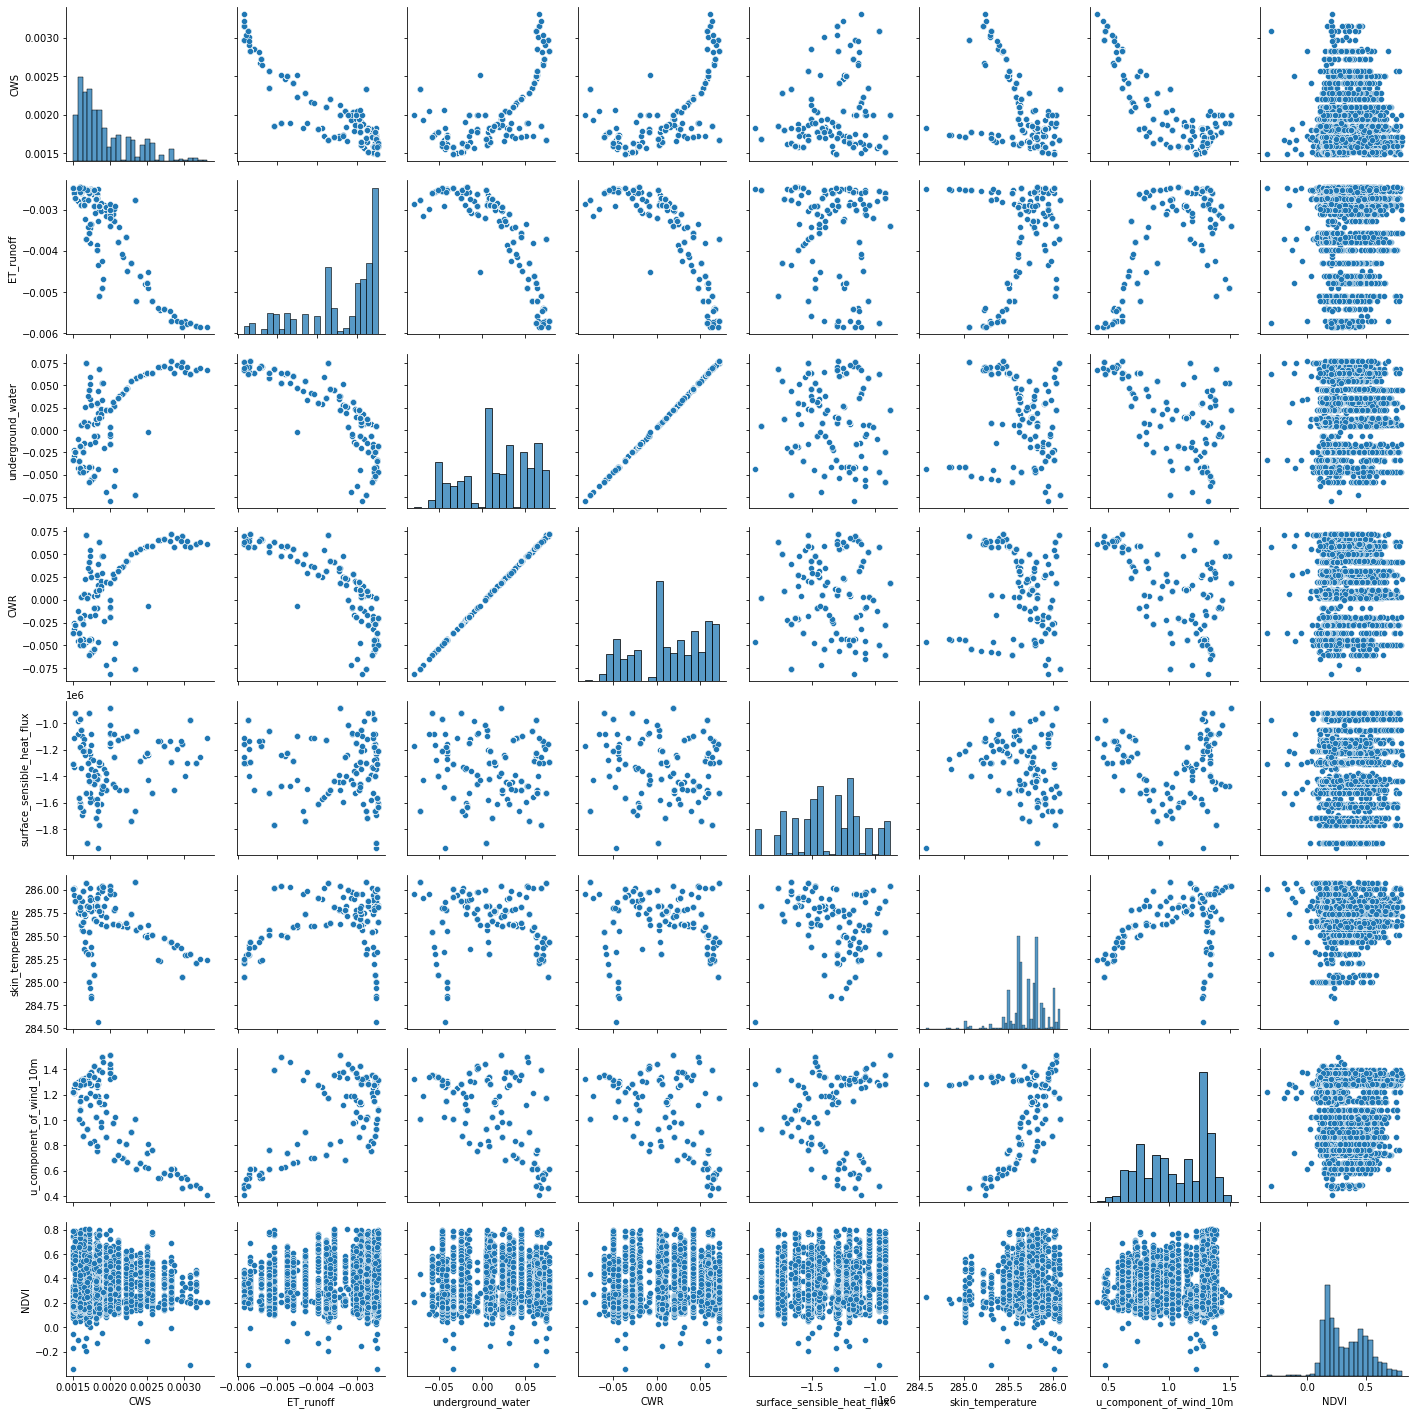

In [17]:
import seaborn as sns

sns.pairplot(df_clean_v3)

In [90]:
# scale the dataset into -1 to 1
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()
df_scale = trans.fit_transform(df_clean_v3)
df_scale = pd.DataFrame(df_scale, columns=['CWS','ET_runoff','underground_water','CWR','surface_sensible_heat_flux','skin_temperature','u_component_of_wind_10m','NDVI'])
df_scale

,CWS,ET_runoff,underground_water,CWR,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,NDVI
0,-0.596970,0.930130,-0.318898,-0.302380,-2.035084,0.561500,-0.477404,-0.795625
1,-1.068416,0.725130,-1.084632,-1.089236,1.714766,0.820855,0.918499,-1.033609
2,-1.068416,0.725130,-1.084632,-1.089236,1.714766,0.820855,0.918499,-1.044026
3,-0.831298,0.529640,-0.290955,-0.283836,1.231899,-0.485897,1.039464,-1.086857
4,-0.831298,0.529640,-0.290955,-0.283836,1.231899,-0.485897,1.039464,-0.975343
...,...,...,...,...,...,...,...,...
2825,1.841159,-1.915565,1.216518,1.194205,-0.609422,-1.074435,-1.141755,-1.301912
2826,2.563671,-2.425951,1.557484,1.529578,0.298056,-1.413591,-1.712020,-0.252030
2827,1.841159,-1.915565,1.216518,1.194205,-0.609422,-1.074435,-1.141755,-0.392283
2828,1.696099,-1.171648,-0.501701,-0.541397,-0.233026,-0.490885,-0.946866,-0.298700


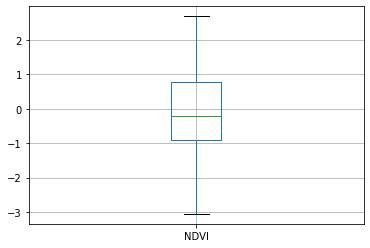

In [40]:
boxplot_1 = df_scale.boxplot(column=['NDVI']) 

# split the data --- without ET_runoff & ground water

In [91]:
# create the x values for the model

x = df_scale[['CWR','surface_sensible_heat_flux','skin_temperature','u_component_of_wind_10m','NDVI'
             ]]
y= df_scale['CWS']

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=42,test_size = 0.3)
print('Training Data Count: {}'.format(x_train.shape[0]))
print('Testing Data Count: {}'.format(x_test.shape[0]))

Training Data Count: 1981
Testing Data Count: 849


In [43]:
y_train

2035   -0.831298
1788   -0.878722
1562    0.111594
2330   -1.140946
1474    0.853633
          ...   
1638   -0.878722
1095   -0.887091
1130   -0.711345
1294   -0.867563
860    -0.281743
Name: CWS, Length: 1981, dtype: float64

# linear model

In [44]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
print(model_lr.coef_)

[ 0.49831012  0.10755567 -0.29734578 -0.41174872  0.0113917 ]


In [45]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

C:\download\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CWS   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     2069.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:58:27   Log-Likelihood:                -984.20
No. Observations:                1981   AIC:                             1980.
Df Residuals:                    1975   BIC:                             2014.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0021      0.009     -0.237      0.812      -0.020       0.015
CWR                            0.4983      0.011     43.628      0.000       0.476       0.521
surface_sensible_heat_flux     0.1076      0.010     10.559      0.000       0.088       0.128
skin_temperature              -0.2973      0.011    -28.057      0.000      -0.318      -0.277
u_component_of_wind_10m       -0.4117      0.012    -34.359      0.000      -0.435      -0.388
NDVI                           0.0114      0.009      1.269      0.205      -0.006       0.029
==============================================================================
Omnibus:                      392.511   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              983.748
Skew:                           1.069   Prob(JB):                    2.41e-214
Kurtosis:                       5.710   Cond. No.                         2.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
x_train=x_train.drop(['const'],axis=1)
x_train

,CWR,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,NDVI
2035,-0.283836,1.231899,-0.485897,1.039464,1.163056
1788,-1.669974,1.542572,0.421847,0.882017,-1.052880
1562,0.167647,-0.510828,-0.555724,-0.715495,0.746321
2330,-1.314635,0.243065,1.509144,0.670808,-0.952394
1474,0.747569,-0.519289,-0.366195,-0.936305,0.412548
...,...,...,...,...,...
1638,-1.669974,1.542572,0.421847,0.882017,2.249837
1095,-1.532369,0.736409,0.352020,0.377034,0.987866
1130,-0.200414,0.623743,0.082690,0.914659,1.277167
1294,-0.882828,-0.990277,0.521599,0.096702,0.372974


In [47]:
lr_train_score=model_lr.score(x_train,y_train)
lr_test_score=model_lr.score(x_test,y_test)
print( "LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

LR training score: 0.8397135837363803
LR test score:  0.82898404911835


# split the data --- with ET_runoff & ground water

In [100]:
x_v2 = df_scale[['ET_runoff','underground_water','surface_sensible_heat_flux','skin_temperature','u_component_of_wind_10m','NDVI'
             ]]
y= df_scale['CWS']

In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_v2, y,random_state=42,test_size = 0.3)
print('Training Data Count: {}'.format(x_train.shape[0]))
print('Testing Data Count: {}'.format(x_test.shape[0]))

Training Data Count: 1981
Testing Data Count: 849



# linear model

In [102]:
from sklearn.linear_model import LinearRegression

model_lr_v2 = LinearRegression()
model_lr_v2.fit(x_train, y_train)
print(model_lr_v2.coef_)

[-0.65007717 -0.0830773  -0.01769555 -0.21766494 -0.40670848  0.01644092]


In [103]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
results_v2 = sm.OLS(y_train, x_train).fit()
results_v2.summary()

C:\download\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CWS   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     5096.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:40:59   Log-Likelihood:                -21.453
No. Observations:                1981   AIC:                             56.91
Df Residuals:                    1974   BIC:                             96.05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0014      0.006     -0.246      0.806      -0.012       0.009
ET_runoff                     -0.6501      0.012    -55.879      0.000      -0.673      -0.627
underground_water             -0.0831      0.013     -6.579      0.000      -0.108      -0.058
surface_sensible_heat_flux    -0.0177      0.007     -2.664      0.008      -0.031      -0.005
skin_temperature              -0.2177      0.007    -32.640      0.000      -0.231      -0.205
u_component_of_wind_10m       -0.4067      0.007    -55.158      0.000      -0.421      -0.392
NDVI                           0.0164      0.006      2.976      0.003       0.006       0.027
==============================================================================
Omnibus:                      857.704   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7937.691
Skew:                           1.791   Prob(JB):                         0.00
Kurtosis:                      12.128   Cond. No.                         4.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
x_train=x_train.drop(['const'],axis=1)
x_train

,ET_runoff,underground_water,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,NDVI
2035,0.529640,-0.290955,1.231899,-0.485897,1.039464,1.163056
1788,0.888919,-1.657475,1.542572,0.421847,0.882017,-1.052880
1562,0.485259,0.152365,-0.510828,-0.555724,-0.715495,0.746321
2330,0.970284,-1.311400,0.243065,1.509144,0.670808,-0.952394
1474,-0.291416,0.739373,-0.519289,-0.366195,-0.936305,0.412548
...,...,...,...,...,...,...
1638,0.888919,-1.657475,1.542572,0.421847,0.882017,2.249837
1095,0.878352,-1.522430,0.736409,0.352020,0.377034,0.987866
1130,0.537037,-0.209422,0.623743,0.082690,0.914659,1.277167
1294,0.991418,-0.888954,-0.990277,0.521599,0.096702,0.372974


In [128]:
x_column = x_train.columns
x_column

Index(['ET_runoff', 'underground_water', 'surface_sensible_heat_flux',
       'skin_temperature', 'u_component_of_wind_10m', 'NDVI'],
      dtype='object')

In [106]:
lr_v2_train_score=model_lr_v2.score(x_train,y_train)
lr_v2_test_score=model_lr_v2.score(x_test,y_test)
print( "LR training score:", lr_v2_train_score)
print("LR test score: ", lr_v2_test_score)

LR training score: 0.9393582811639823
LR test score:  0.9363956075386582


# Tune the model

In [ ]:
# tune alpha
# Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures.

# A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable.
# This is particularly true for problems with few observations (samples) or less samples (n) than input predictors (p) or variables (so-called p >> n problems).

# A popular penalty is to penalize a model based on the sum of the absolute coefficient values. This is called the L1 penalty. An L1 penalty minimizes the size of 
# all coefficients and allows some coefficients to be minimized to the value zero, which removes the predictor from the model.

# An L1 penalty minimizes the size of all coefficients and allows any coefficient to go to the value of zero

In [123]:
# Lasso--original one

lasso_01 = linear_model.Lasso(alpha=0.1)
lasso_01.fit(x_train,y_train)
# pred_train_lasso = lasso.predict(x_train)

train_score=lasso_01.score(x_train,y_train)
test_score=lasso_01.score(x_test,y_test)
coeff_used = np.sum(lasso_01.coef_!=0)
coef_01 = lasso_01.coef_

ypred = lasso_01.predict(x_test)
mse = mean_squared_error(y_test, ypred)

# MSE_Lasso = np.sqrt(mean_squared_error(y_train,pred_train_lasso))
# R2_Lasso = r2_score(y_train, pred_train_lasso)

print('MSE_Lasso',mse)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
print ("coefficients:", coef_01)

MSE_Lasso 0.08535466856267905
training score: 0.9204771519283865
test score:  0.9171622281637507
number of features used:  3
coefficients: [-0.52107765  0.          0.         -0.15934945 -0.35786062  0.        ]


In [121]:
# Lasso with alpha=0.01

lasso001 = linear_model.Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)


train_score001=lasso001.score(x_train,y_train)
test_score001=lasso001.score(x_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
coef_001 = lasso001.coef_

print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
print ("coefficients:", coef_001)

training score for alpha=0.01: 0.9377683606458808
test score for alpha =0.01:  0.9344052904652015
number of features used: for alpha =0.01: 4
coefficients: [-0.57917417 -0.          0.         -0.22034107 -0.3911223   0.00820612]


In [120]:
# Lasso with alpha=0.0001


lasso0001 = linear_model.Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(x_train,y_train)

train_score0001=lasso0001.score(x_train,y_train)
test_score0001=lasso0001.score(x_test,y_test)
coeff_used0001 = np.sum(lasso0001.coef_!=0)
coef_0001 = lasso0001.coef_

print ("training score for alpha=0.0001:", train_score0001)
print ("test score for alpha =0.0001: ", test_score0001)
print ("number of features used: for alpha =0.0001:", coeff_used0001)
print ("coefficients:", coef_0001)

training score for alpha=0.0001: 0.9393580111229788
test score for alpha =0.0001:  0.9363937204063814
number of features used: for alpha =0.0001: 6
coefficients: [-0.64916677 -0.08197816 -0.01732257 -0.21767367 -0.40655163  0.01636384]


In [118]:
# initialize data of lists.
data_score = {'training score':[train_score, train_score001,train_score0001],
        'test score':[test_score, test_score001,test_score0001]
        }
 
# Creates pandas DataFrame.
df_score = pd.DataFrame(data_score,index =['alpha=0.1',
                                'alpha=0.01',
                                'alpha=0.0001'])
 
# print the data
df_score

,training score,test score
alpha=0.1,0.920477,0.917162
alpha=0.01,0.937768,0.934405
alpha=0.0001,0.939358,0.936394


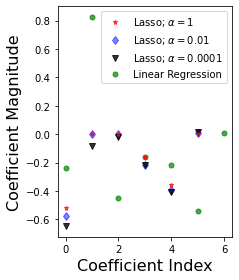

In [119]:
plt.subplot(1,2,2)
plt.plot(lasso_01.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso0001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency
plt.plot(model_lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=10,loc=1)
plt.tight_layout()
plt.show()

In [137]:
# Create a function called lasso,
def lasso_func(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = ['ET_runoff', 'underground_water', 'surface_sensible_heat_flux',
       'skin_temperature', 'u_component_of_wind_10m', 'NDVI']
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = linear_model.Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(x_train,y_train)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
       
    # Return the datafram    
    return df

In [138]:
lasso_func([.0001, 0.01, 0.1])

,Feature Name,Alpha = 0.000100,Alpha = 0.010000,Alpha = 0.100000
0,ET_runoff,-0.649167,-0.579174,-0.521078
1,underground_water,-0.081978,-0.000000,0.000000
2,surface_sensible_heat_flux,-0.017323,0.000000,0.000000
3,skin_temperature,-0.217674,-0.220341,-0.159349
4,u_component_of_wind_10m,-0.406552,-0.391122,-0.357861
5,NDVI,0.016364,0.008206,0.000000


In [112]:
# understanding of the result

# 'Reduce this under-fitting by reducing alpha and increasing number of iterations. Now α = 0.01, non-zero features =10, training and test score increases.
# Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01.
# Further reduce α =0.0001, non-zero features = 22. Training and test scores are similar to basic linear regression case.
# In the right panel of figure, for α = 0.0001, coefficients for Lasso regression and linear regression show close resemblance.'

# Polynomia Model

In [113]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_train)

model_poly = LinearRegression()

model_poly.fit(x_train, y_train)

y_predicted = model_poly.predict(x_train)

rmse = np.sqrt(mean_squared_error(y_train,y_predicted))
r2 = r2_score(y_train,y_predicted)


print ("rmse", rmse)
print ("r2", r2)

rmse 0.24460539884923213
r2 0.9393582811639823




# re-select columns. without any calculation sets

In [73]:
df_clean_new1 = df_clean[['CWS','total_evaporation','runoff','underground_water','surface_sensible_heat_flux','skin_temperature','u_component_of_wind_10m','NDVI']]
df_clean_new1.dropna()

,CWS,total_evaporation,runoff,underground_water,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,NDVI
0,0.001690,-0.002283,0.000232,0.004623,-1900802.000,285.825851,0.928651,0.197296
1,0.001521,-0.002518,0.000191,-0.025055,-922280.000,285.876633,1.283631,0.155782
2,0.001521,-0.002518,0.000191,-0.025055,-922280.000,285.876633,1.283631,0.153965
3,0.001606,-0.002482,0.000412,0.005706,-1048284.000,285.620773,1.314393,0.146493
4,0.001606,-0.002482,0.000412,0.005706,-1048284.000,285.620773,1.314393,0.165946
...,...,...,...,...,...,...,...,...
3770,0.002084,-0.002404,0.000337,-0.119888,-1500316.000,285.970383,1.067323,0.257687
3771,0.002084,-0.002404,0.000337,-0.119888,-1500316.000,285.970383,1.067323,0.169968
3772,0.002334,-0.002356,0.000787,-0.101700,-1463576.000,285.845383,0.908631,0.210841
3773,0.002512,-0.002354,0.002150,-0.002462,-1430555.667,285.619797,0.809266,0.283981


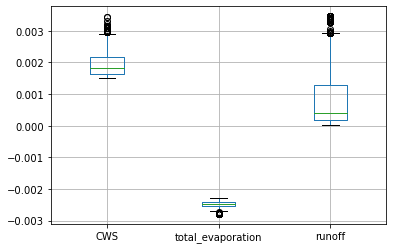

In [75]:
boxplot = df_clean_new1.boxplot(column=['CWS','total_evaporation','runoff'])

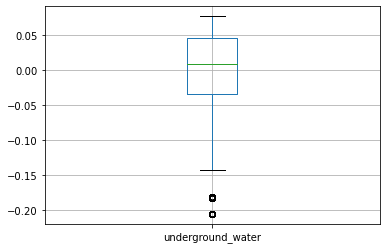

In [76]:
boxplot = df_clean_new1.boxplot(column=['underground_water'])

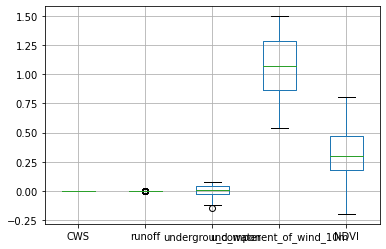

In [79]:
df_clean_new2 = df_clean_new1[(df_clean_new1['CWS']<0.003)& (df_clean_new1['runoff']<0.003)& (df_clean_new1['underground_water']>-0.15)& (df_clean_new1['u_component_of_wind_10m']>0.4)&(df_clean_new1['NDVI']>-0.2)]
boxplot = df_clean_new2.boxplot(column=['CWS','runoff','underground_water','u_component_of_wind_10m','NDVI']) 

In [83]:
# scale the dataset into -1 to 1
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()
df_scale_new = trans.fit_transform(df_clean_new2)
df_scale_new = pd.DataFrame(df_scale, columns=['CWS','total_evaporation','runoff','underground_water','surface_sensible_heat_flux','skin_temperature','u_component_of_wind_10m','NDVI'])
df_scale_new

,CWS,total_evaporation,runoff,underground_water,surface_sensible_heat_flux,skin_temperature,u_component_of_wind_10m,NDVI
0,-0.629353,1.792046,-0.712778,-0.084340,-2.021235,0.469833,-0.574625,-0.804165
1,-1.178018,-0.654152,-0.761063,-0.723438,1.772581,0.742240,0.928738,-1.042893
2,-1.178018,-0.654152,-0.761063,-0.723438,1.772581,0.742240,0.928738,-1.053342
3,-0.902062,-0.279415,-0.500793,-0.061018,1.284052,-0.630272,1.059016,-1.096307
4,-0.902062,-0.279415,-0.500793,-0.061018,1.284052,-0.630272,1.059016,-0.984444
...,...,...,...,...,...,...,...,...
2875,0.649782,0.532514,-0.589120,-2.765610,-0.468516,1.245145,0.012659,-0.456890
2876,0.649782,0.532514,-0.589120,-2.765610,-0.468516,1.245145,0.012659,-0.961315
2877,1.461416,1.032163,-0.059158,-2.373942,-0.326071,0.574605,-0.659408,-0.726276
2878,2.039299,1.052982,1.546039,-0.236911,-0.198049,-0.635510,-1.080226,-0.305688


In [80]:
# split the data

In [84]:
x_v3 = df_scale_new[['total_evaporation','runoff','underground_water','surface_sensible_heat_flux','skin_temperature','u_component_of_wind_10m','NDVI'
             ]]
y= df_scale_new['CWS']

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_v3, y,random_state=42,test_size = 0.3)
print('Training Data Count: {}'.format(x_train.shape[0]))
print('Testing Data Count: {}'.format(x_test.shape[0]))

Training Data Count: 2016
Testing Data Count: 864


# linear model

In [86]:
from sklearn.linear_model import LinearRegression

model_lr_new = LinearRegression()
model_lr_new.fit(x_train, y_train)
print(model_lr_new.coef_)

[-0.23981664  0.82670699 -0.45119231 -0.16033428 -0.21486236 -0.53944561
  0.00506699]


In [87]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

C:\download\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CWS   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     3485.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:35:20   Log-Likelihood:                -292.17
No. Observations:                2016   AIC:                             600.3
Df Residuals:                    2008   BIC:                             645.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0013      0.006     -0.201      0.841      -0.014       0.011
total_evaporation             -0.2398      0.008    -28.753      0.000      -0.256      -0.223
runoff                         0.8267      0.010     86.410      0.000       0.808       0.845
underground_water             -0.4512      0.010    -45.594      0.000      -0.471      -0.432
surface_sensible_heat_flux    -0.1603      0.008    -19.651      0.000      -0.176      -0.144
skin_temperature              -0.2149      0.007    -28.910      0.000      -0.229      -0.200
u_component_of_wind_10m       -0.5394      0.008    -65.609      0.000      -0.556      -0.523
NDVI                           0.0051      0.006      0.793      0.428      -0.007       0.018
==============================================================================
Omnibus:                       90.837   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.560
Skew:                           0.080   Prob(JB):                     8.05e-64
Kurtosis:                       4.853   Cond. No.                         3.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""